# Assignment Sheet Python
## Submission deadline 1.6.2021 10:00 a.m.



### Exercise 1 - Numerical Integration (8 Points)

Write a Python program that integrates the function
\begin{align}
    f(x,y) = exp(-0.5(x^2+y^2))
\end{align}
in the limits $x \in [-1,1]$ and $y \in [-1,1]$ numerically. To do so, draw a few million random
numbers for each x, y, and z and store these random numbers in arrays. Count, how often
the value of z is less than f(x,y). Choose an appropriate range for z. From the result, estimate
the integral
\begin{align}
    \int_{-1}^1\int_{-1}^1 f(x,y) dx dy
\end{align}

#### a) How long does the integration take without running parallel?

In [1]:
import numpy as np
import time
import random

x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
z_min, z_max = 0.0, 1.0

def main():
    draw_num = 2000000
    x_arr = []
    y_arr = []
    z_arr = []
    res_arr= []
    i_set = np.arange(0,draw_num,1)
    
    
    for i in i_set:
        len = np.sqrt(np.random.random())
        x_arr.append(np.random.uniform(-1,1))
        y_arr.append(np.random.uniform(-1,1))
        z_arr.append(np.random.uniform(-1,1))
        x_arr[i] = np.random.uniform(-1,1)
        y_arr[i] = np.random.uniform(-1,1)
        z_arr[i] = random.uniform(0,1)
        res_arr.append(np.exp(-0.5*((x_arr[i]**2) + (y_arr[i]**2))))
    
    count = 0
    for i in range(draw_num):
        if res_arr[i] > z_arr[i]:
            count += 1
        
    ratio = count/draw_num
    volume = (x_max-x_min)*(y_max-y_min)*(z_max-z_min) 
    value = ratio * volume
    print("estimate the integral: %s" %value)
    
start_time = time.time()
main()
end_time = time.time()
print("--- %s seconds ----" %(end_time-start_time))


estimate the integral: 2.928146
--- 33.5098717212677 seconds ----


Your Answer Here:

#### b) Rewrite your code using multi-threading. Create 10 threads, each thread processing a certain range of the created points.

In [2]:
#Your Code Here:
import numpy as np
import threading
import time
import random
import concurrent.futures
from queue import Queue

x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
z_min, z_max = 0.0, 1.0

threads = []
myLock = threading.Lock()

def main(num,thread_id):
    print("Thread:", thread_id)
    num = num*200000
    draw_num = num
    x_arr, y_arr, z_arr, res_arr = [], [], [],[]
    i_set = np.arange(0,draw_num,1)
    
    for i in i_set:
        len = np.sqrt(np.random.random())
        x_arr.append(np.random.uniform(-1,1))
        y_arr.append(np.random.uniform(-1,1))
        z_arr.append(np.random.uniform(-1,1))
        x_arr[i] = np.random.uniform(-1,1)
        y_arr[i] = np.random.uniform(-1,1)
        z_arr[i] = random.uniform(0,1)
        res_arr.append(np.exp(-0.5*((x_arr[i]**2) + (y_arr[i]**2))))
        
    print(num)

    count = 0
    for i in range(draw_num):
        if res_arr[i] > z_arr[i]:
            count += 1
        
    ratio = count/draw_num
    volume = (x_max-x_min)*(y_max-y_min)*(z_max-z_min) 
    value = ratio * volume
    print("estimate the integral: %s" %value)
    
start_time = time.time()
    
for i in range(0,10):
    t = threading.Thread(target=main, args=(1,i))
    threads.append(t)
    t.start()

for t in threading.enumerate():
    print(t)
    
for i in range(0,10):
    threads[i].join()
    
end_time = time.time()

time_t_10 = end_time-start_time

print("Done.")
print("--- %s seconds ----" %(end_time-start_time))

Thread: 0
Thread: 1
Thread: 2
Thread: 3
Thread: 4
Thread: 5
Thread: 6
Thread: 7
Thread: 8
Thread: 9
<_MainThread(MainThread, started 140361880340288)>
<Thread(Thread-2, started daemon 140361745823488)>
<Heartbeat(Thread-3, started daemon 140361737430784)>
<HistorySavingThread(IPythonHistorySavingThread, started 140361712252672)>
<ParentPollerUnix(Thread-1, started daemon 140361703859968)>
<Thread(Thread-4, started 140360855222016)>
<Thread(Thread-5, started 140360846829312)>
<Thread(Thread-6, started 140360838436608)>
<Thread(Thread-7, started 140360830043904)>
<Thread(Thread-8, started 140360821651200)>
<Thread(Thread-9, started 140360604972800)>
<Thread(Thread-10, started 140360596580096)>
<Thread(Thread-11, started 140360588187392)>
<Thread(Thread-12, started 140360579794688)>
<Thread(Thread-13, started 140360571401984)>
200000
estimate the integral: 2.92238
200000
estimate the integral: 2.91862
200000
200000
estimate the integral: 2.92396
estimate the integral: 2.92604
200000
estim

Your Answer Here:

#### c) Now, create a single thread for the evaluation of each random point. Compare the performance to the result from b).

In [3]:
#Your Code Here
import numpy as np
import threading
import time
import random
import concurrent.futures
from queue import Queue

x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
z_min, z_max = 0.0, 1.0

threads = []
myLock = threading.Lock()

def main(num,thread_id):
    print("Thread:", thread_id)
    num = num*2000000
    global draw_num
    draw_num = num
    x_arr, y_arr, z_arr, res_arr = [], [], [],[]
    i_set = np.arange(0,draw_num,1)
    
    for i in i_set:
        len = np.sqrt(np.random.random())
        x_arr.append(np.random.uniform(-1,1))
        y_arr.append(np.random.uniform(-1,1))
        z_arr.append(np.random.uniform(-1,1))
        x_arr[i] = np.random.uniform(-1,1)
        y_arr[i] = np.random.uniform(-1,1)
        z_arr[i] = random.uniform(0,1)
        res_arr.append(np.exp(-0.5*((x_arr[i]**2) + (y_arr[i]**2))))
        
    print(num)

    count = 0
    for n in range(draw_num):
        if res_arr[n] > z_arr[n]:
            count += 1
        
    ratio = count/draw_num
    volume = (x_max-x_min)*(y_max-y_min)*(z_max-z_min) 
    value = ratio * volume
    print("estimate the integral: %s" %value)
    return value
    
start_time = time.time()    
for i in range(0,1):
    t = threading.Thread(target=main, args=(1,i))
    threads.append(t)
    t.start()

for i in range(0,1):
    threads[i].join() 
    
end_time = time.time()
    
time_t_1 = end_time-start_time
print("Done.")
print("--- %s seconds ----" %(end_time-start_time))
print("----------")
print("10 threads: %s seconds " % time_t_10)
print("1 thread: %s seconds " % time_t_1)

Thread: 0
2000000
estimate the integral: 2.92942
Done.
--- 34.212976694107056 seconds ----
----------
10 threads: 53.90786004066467 seconds 
1 thread: 34.212976694107056 seconds 


Your Answer here:

#### d) Rewrite your code using multi-processing. Create a pool and use the Pool.apply, Pool.map or Pool.starmap function. Compare the CPU occupancy for multi-processing and multithreading with a tool like top of htop. How many python processes are running in both cases? Which fraction of CPU time are the processes maximally occupying?

In [4]:
# Your Code Here
import multiprocessing as mp
import numpy as np
import time
import random

x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
z_min, z_max = 0.0, 1.0

def main(process_id, num): 
    print(num)
    global draw_num
    draw_num = num
    x_arr, y_arr, z_arr, res_arr = [], [], [],[]
    i_set = np.arange(0,draw_num,1)
    
    for i in i_set:
        len = np.sqrt(np.random.random())
        x_arr.append(np.random.uniform(-1,1))
        y_arr.append(np.random.uniform(-1,1))
        z_arr.append(np.random.uniform(-1,1))
        x_arr[i] = np.random.uniform(-1,1)
        y_arr[i] = np.random.uniform(-1,1)
        z_arr[i] = random.uniform(0,1)
        res_arr.append(np.exp(-0.5*((x_arr[i]**2) + (y_arr[i]**2))))
    
    count = 0
    for n in range(draw_num):
        if res_arr[n] > z_arr[n]:
            count += 1
        
    ratio = count/draw_num
    volume = (x_max-x_min)*(y_max-y_min)*(z_max-z_min) 
    value = ratio * volume
    return value
    print("estimate the integral: %s" %value)
    
pool = mp.Pool(mp.cpu_count())

start_time = time.time()
values = [ pool.apply(main, args=(a,200000)) for a in range(1,11) ]
end_time = time.time()
pool.close()

print(values)
syn_multipro = end_time-start_time
print("--- %s seconds ---" %(end_time-start_time))

200000
200000
200000
200000
200000
200000
200000
200000
200000
200000
[2.9273, 2.93468, 2.93182, 2.92928, 2.9302, 2.92504, 2.92348, 2.92958, 2.92164, 2.9207]
--- 34.65074396133423 seconds ---


Your Answer here: As what I oberve using the tool htop, no big difference regarding using multithreading and multi-processes when considering about CPU occupancy. Both are around 90% ~ 95%.

#### e) Change the previous program to use asynchronous execution of parallel processes. Compare the performance between synchronous and asynchronous execution.

In [5]:
# Your Code Here
import multiprocessing as mp
import numpy as np
import time
import random

x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
z_min, z_max = 0.0, 1.0

def main(process_id, num):
    num = num*100000
    print(num)
    global draw_num
    draw_num = num
    x_arr, y_arr, z_arr, res_arr = [], [], [],[]
    i_set = np.arange(0,draw_num,1)
    
    for i in i_set:
        len = np.sqrt(np.random.random())
        x_arr.append(np.random.uniform(-1,1))
        y_arr.append(np.random.uniform(-1,1))
        z_arr.append(np.random.uniform(-1,1))
        x_arr[i] = np.random.uniform(-1,1)
        y_arr[i] = np.random.uniform(-1,1)
        z_arr[i] = random.uniform(0,1)
        res_arr.append(np.exp(-0.5*((x_arr[i]**2) + (y_arr[i]**2))))
    
    count = 0
    for n in range(draw_num):
        if res_arr[n] > z_arr[n]:
            count += 1
        
    ratio = count/draw_num
    volume = (x_max-x_min)*(y_max-y_min)*(z_max-z_min) 
    value = ratio * volume
    print("estimate the integral: %s" %value)
    return value
    
pool = mp.Pool(mp.cpu_count())

start_time = time.time()
values_objects = [ pool.apply_async(main, args=(a,2)) for a in range(1,11) ]
values = [r.get() for r in values_objects]
end_time = time.time()
pool.close()

print(values_objects)
asyn_multipro = end_time-start_time
print("--- %s seconds ---" %(end_time-start_time))
print("----------")
print("synchronous multiprecessing: %s seconds" % syn_multipro)
print("asynchronous multiprecessing: %s seconds" % asyn_multipro)


200000200000
200000200000


estimate the integral: 2.93198
200000
estimate the integral: 2.93346
estimate the integral: 2.928
200000
200000
estimate the integral: 2.92492
200000
estimate the integral: 2.92798
200000
estimate the integral: 2.93186
estimate the integral: 2.92726
200000
estimate the integral: 2.9304
estimate the integral: 2.92846
estimate the integral: 2.92466
[<multiprocessing.pool.ApplyResult object at 0x7fa84eeca490>, <multiprocessing.pool.ApplyResult object at 0x7fa83d367bb0>, <multiprocessing.pool.ApplyResult object at 0x7fa815685f70>, <multiprocessing.pool.ApplyResult object at 0x7fa815685820>, <multiprocessing.pool.ApplyResult object at 0x7fa8156856d0>, <multiprocessing.pool.ApplyResult object at 0x7fa815685040>, <multiprocessing.pool.ApplyResult object at 0x7fa815685c40>, <multiprocessing.pool.ApplyResult object at 0x7fa815685ee0>, <multiprocessing.pool.ApplyResult object at 0x7fa8156907f0>, <multiprocessing.pool.ApplyResult object at 0x7fa815690790>]
--- 24.41118

Your Answer Here: As the results shown above, we can see that the performance is higher when using asynchrnous multiprocesses, compare when using synchronous multiprocesses. 

### Exercise 2 - Gaussian Image Filter 2 (7 Points)

Mathematically a Gaussian Blur is defined by:
\begin{align}
    G(x,y) = \frac{1}{2\pi\sigma^2} exp(-\frac{x^2+y^2}{2\sigma^2})
\end{align}
here, $x$ is the distance from the origin on the x-Axis, $y$ is the distance from the origin on the y-Axis, and $\sigma$ is the standard deviation.

If you want to blur an image with $G(x,y)$ you define a Gaussian-Kernel and convolve it with the original image.

You can use the test image I puloaded to Stud.IP.

#### a) Use the above equation to obtain an Gaussian 3x3 Kernel. (If you have problems getting started you may start with an 3x3 Kernel which performs averaging). Then let it run without any parallelization. Plot the unprocessed and the processed image.

In [6]:
# Your code here
import math
import numpy as np
import matplotlib.pyplot as plt
import time

#gaussian blur
def G(x,y,sigma):
    return 1/(2*math.pi*sigma**2)*math.exp(-(x**2+y**2)/(2*sigma**2))

#computes gaussian kernel
def K(size, sigma):
    K = np.empty((size,size))
    sumG = 0
    for x in range(size):
        for y in range(size):
            tempG = G(x-(size-1)/2,y-(size-1)/2,sigma)
            K[x][y] = tempG
            sumG += tempG
    for x in range(size):
        for y in range(size):
            K[x][y] /= sumG
    return K

#processes one image line
def proc(im,K,line):
    im2 = np.empty(im.shape[1]-sizeK+1)
    for x in range(im2.size):
        sum = 0
        for m in range(sizeK):
            for n in range(sizeK):
                sum += im[line+m][x+n]*K[sizeK-m-1][sizeK-n-1]
            im2[x] = sum
    return line,im2
            
def plot(im,im2):
    plt.figure().set_size_inches(30, 20)
    plt.subplot(121)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.subplot(122)
    plt.imshow(im2, cmap='gray', vmin=0, vmax=255)

Time: 8.5784 sec


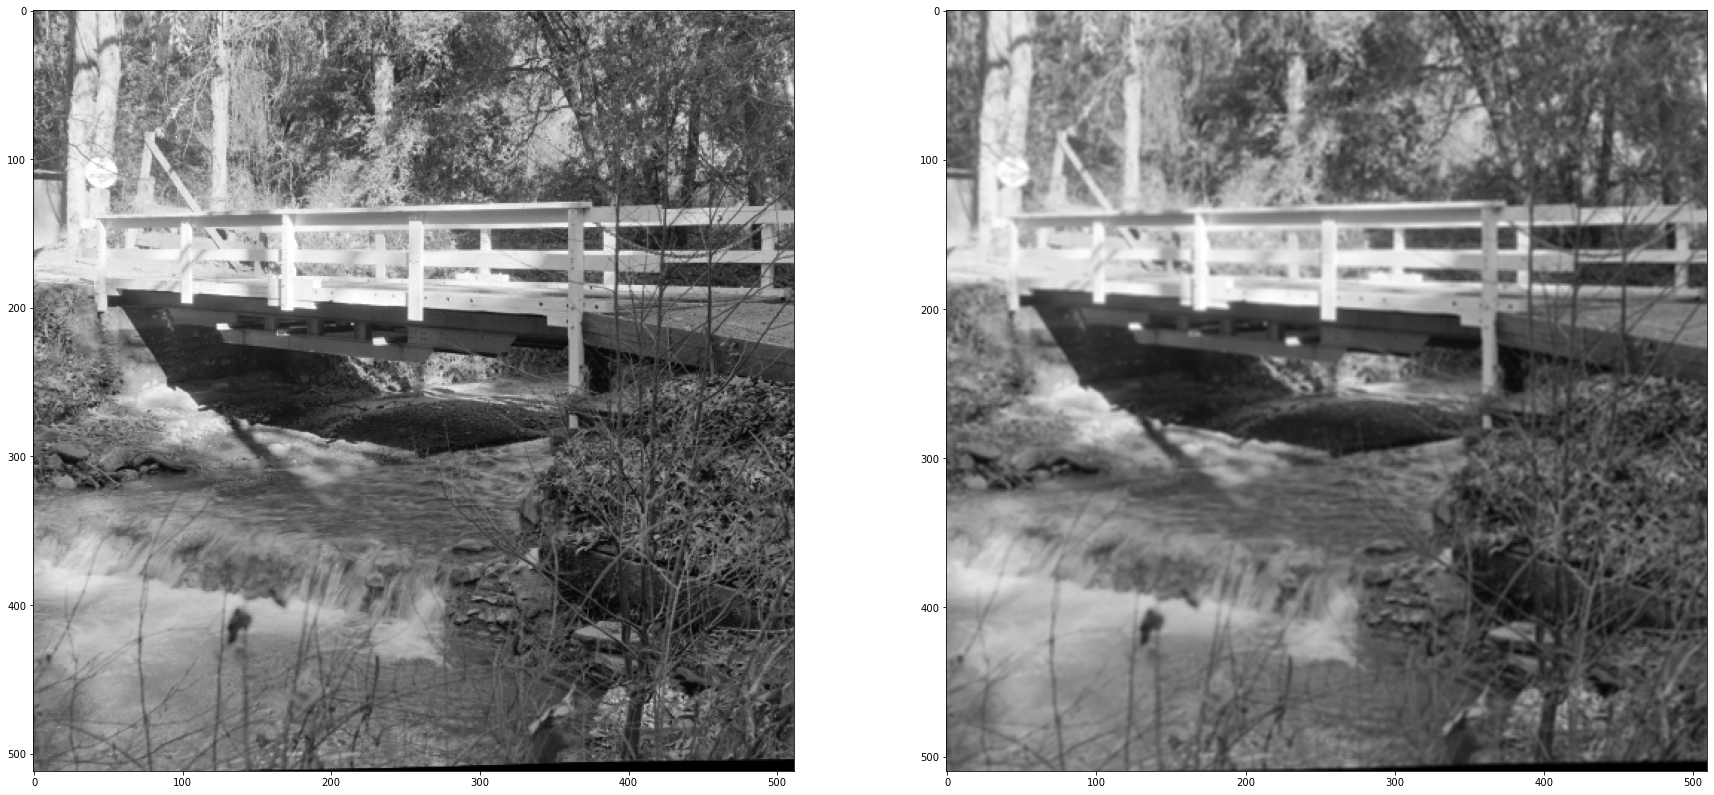

In [7]:
im = plt.imread("5.2.10.tiff")
sizeK = 3
ker = K(sizeK,2)
im2 = np.empty((im.shape[0]-sizeK+1,im.shape[1]-sizeK+1))

t = time.perf_counter()
for x in range(im2.shape[0]):
    im2[x] = proc(im,ker,x)[1]
print("Time: %.4f sec" %(time.perf_counter()-t))

plot(im,im2)

#### b) Think about a parallelization strategy. Implement it. Please explain your parallelization strategy, why did you chose Threads/Processes, how did you distribute your computations? How is the performance improvement?

Time: 8.5805 sec


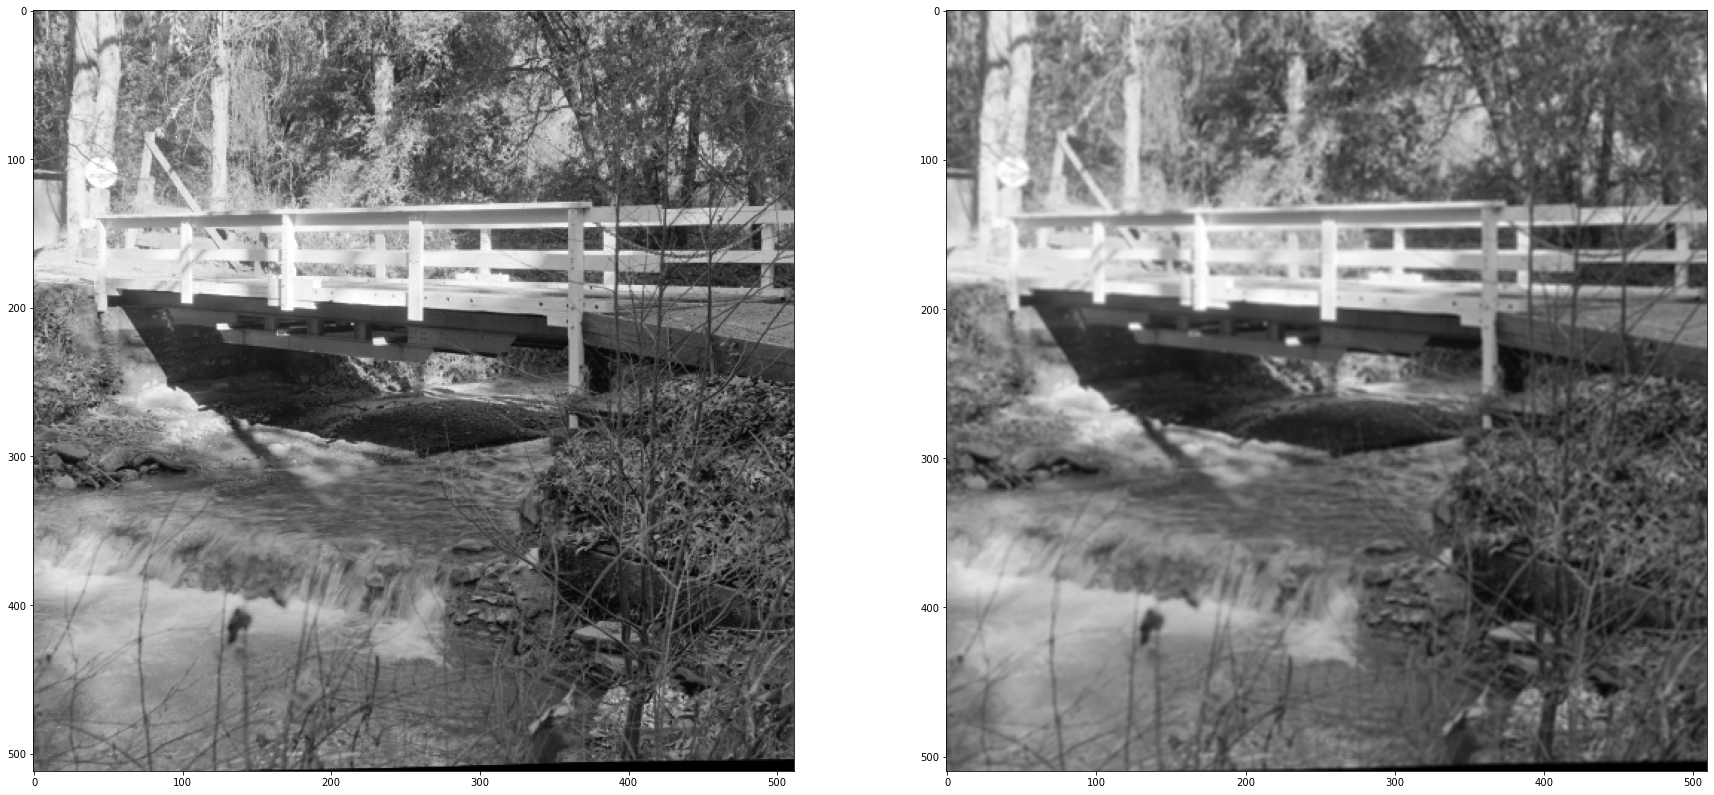

In [8]:
# Your Code Here
import multiprocessing as mp

im = plt.imread("5.2.10.tiff")
sizeK = 3
ker = K(sizeK,2)
im2 = np.empty((im.shape[0]-sizeK+1,im.shape[1]-sizeK+1))

def collect(result):
    global im2
    im2[result[0]] = result[1]

curT = time.perf_counter()

pool = mp.Pool(mp.cpu_count())
[pool.apply_async(proc,args=(im,ker,line),callback = collect) for line in range(im.shape[0]-sizeK+1)]
pool.close()
pool.join()

print("Time: %.4f sec" %(time.perf_counter()-curT))
plot(im,im2)

Processes can read read the image faster, bc every process has its own copy.

Work-distribution: each line of the image

Performance with 2 cores:
- sequential ~5sec
- parallel   ~3sec

Your Answer here: